###  Create a case study by describing the impact of the leverage points. Check whether the leverage points
 ### has a sizable impact on the conclusion. Compute the leverage statistics for each of the observations. 
### Identify how the removal of the leverage points helps in improving the model. Read about Cook's distance and 
### compute the statistics


In [1]:
import numpy as np

import math

from scipy import stats

import pandas as pd
import statsmodels.api as sm

from statsmodels.graphics.regressionplots import *


import matplotlib.pyplot as plt

C:\Users\khann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


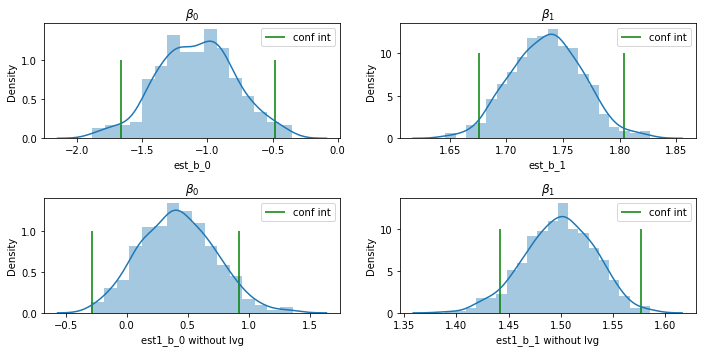

In [2]:
b_0=0.4
b_1=1.5
sigma=1
rep=500
est_b_0=np.zeros(rep)
est_b_1=np.zeros(rep)
f = plt.figure(figsize=(10,5))
np.random.seed(123)
for i in range(rep):
    x=np.linspace(1,15,50)
    l=len(x)
    y=b_0+b_1*x+np.random.normal(0,1,l)
    x0=np.append(x,18)
    y0=np.append(y,50)
    n=len(x0)
    lm=stats.linregress(x0,y0)
    est_b_0[i]=lm.intercept
    est_b_1[i]=lm.slope

    
vr_b0=sigma**2*((1/n)+((np.mean(x0))**2)/sum((x0-np.mean(x0))**2))
q=np.sqrt(vr_b0)
var_b1=sigma**2/sum((x0-np.mean(x0))**2)
q1=np.sqrt(var_b1)

import seaborn as sns
plt.subplot(2,2,1)
sns.distplot(est_b_0)
plt.vlines(est_b_0[i]-1.96*q, ymin=0,ymax=1,color="green",label='conf int')
plt.vlines(est_b_0[i]+1.96*q, ymin=0,ymax=1,color="green" )
plt.legend()
plt.title(r"$\beta_0$")
plt.xlabel('est_b_0')
plt.ylabel('Density')

plt.subplot(2,2,2)
sns.distplot(est_b_1,bins=20)
plt.vlines(est_b_1[i]-1.96*q1, ymin=0,ymax=10,color="green",label='conf int' )
plt.vlines(est_b_1[i]+1.96*q1, ymin=0,ymax=10,color="green" )
plt.legend()
plt.xlabel('est_b_1')
plt.ylabel('Density')
plt.title(r"$\beta_1$")
plt.tight_layout()

est1_b_0=np.zeros(rep)
est1_b_1=np.zeros(rep)
for i in range(rep):
    x=np.linspace(1,15,50)
    l=len(x)
    y=b_0+b_1*x+np.random.normal(0,1,l)
    x0=np.append(x,18)
    y0=np.append(y,50)
    n=len(x0)
    x1=np.delete(x0,50)
    y1=np.delete(y0,50)
    m=len(x1)
    lm1=stats.linregress(x1,y1) ## linear model without leverag
    est1_b_0[i]=lm1.intercept
    est1_b_1[i]=lm1.slope
vr_b0=sigma**2*((1/m)+((np.mean(x1))**2)/sum((x1-np.mean(x1))**2))
vr_b0
q=np.sqrt(vr_b0)
var_b1=sigma**2/sum((x1-np.mean(x1))**2)
q1=np.sqrt(var_b1)
import seaborn as sns

plt.subplot(2,2,3)
sns.distplot(est1_b_0)
plt.vlines(est1_b_0[i]-1.96*q, ymin=0,ymax=1,color="green",label='conf int')
plt.vlines(est1_b_0[i]+1.96*q, ymin=0,ymax=1,color="green" )
plt.legend()
plt.title(r"$\beta_0$")
plt.xlabel('est1_b_0 without lvg')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.distplot(est1_b_1,bins=20)
plt.vlines(est1_b_1[i]-1.96*q1, ymin=0,ymax=10,color="green",label='conf int' )
plt.vlines(est1_b_1[i]+1.96*q1, ymin=0,ymax=10,color="green" )
plt.legend()
plt.xlabel('est1_b_1 without lvg')
plt.ylabel('Density')
plt.title(r"$\beta_1$")
plt.tight_layout()

In [4]:
stats.linregress??

In [3]:
lm.intercept,lm1.intercept,lm.slope,lm1.slope

(-1.074298390183662,
 0.31718076909817405,
 1.7397584553541505,
 1.5094003262672504)

In [4]:
x2=[1]*n
X=np.column_stack((x2,x0))
b=[0.4,1.5]
y=X.dot(b)+np.random.normal(0,1,n)
h= X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
##leverage points
p=np.zeros(n)
for i in range(0,51):
    p[i]=h[i,i]

q=sum(p)
p

array([0.07422958, 0.06997826, 0.06589916, 0.06199228, 0.0582576 ,
       0.05469514, 0.0513049 , 0.04808687, 0.04504105, 0.04216744,
       0.03946605, 0.03693688, 0.03457991, 0.03239516, 0.03038263,
       0.0285423 , 0.0268742 , 0.0253783 , 0.02405462, 0.02290315,
       0.0219239 , 0.02111686, 0.02048203, 0.02001942, 0.01972902,
       0.01961083, 0.01966486, 0.0198911 , 0.02028956, 0.02086022,
       0.02160311, 0.0225182 , 0.02360551, 0.02486504, 0.02629677,
       0.02790072, 0.02967689, 0.03162527, 0.03374586, 0.03603866,
       0.03850368, 0.04114092, 0.04395036, 0.04693202, 0.0500859 ,
       0.05341198, 0.05691028, 0.0605808 , 0.06442353, 0.06843847,
       0.12099276])

In [5]:
h

array([[ 0.07422958,  0.07206087,  0.06989216, ..., -0.02986852,
        -0.03203723, -0.05480869],
       [ 0.07206087,  0.06997826,  0.06789566, ..., -0.0279041 ,
        -0.0299867 , -0.05185404],
       [ 0.06989216,  0.06789566,  0.06589916, ..., -0.02593968,
        -0.02793618, -0.04889939],
       ...,
       [-0.02986852, -0.0279041 , -0.02593968, ...,  0.06442353,
         0.06638795,  0.08701433],
       [-0.03203723, -0.0299867 , -0.02793618, ...,  0.06638795,
         0.06843847,  0.08996898],
       [-0.05480869, -0.05185404, -0.04889939, ...,  0.08701433,
         0.08996898,  0.12099276]])

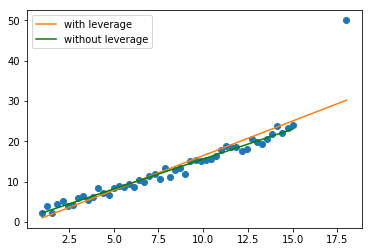

In [6]:
x=np.linspace(1,15,50)
n=len(x)
y=b_0+b_1*x+np.random.normal(0,1,n)
x0=np.append(x,18)
y0=np.append(y,50)
m=len(x0)
m
x1=np.delete(x0,50)
lm=stats.linregress(x0,y0)
y1=np.delete(y0,50)
lm1=stats.linregress(x1,y1)
plt.plot(x0,y0,'o')
plt.plot(x0,lm.intercept+lm.slope*x0,label='with leverage')
plt.plot(x1,lm1.intercept+lm1.slope*x1,'g',label='without leverage')
plt.legend()



### The leverage hii is a measure of the distance between the x value for the ith data point and the mean of the x values for all n data points.
### The leverage hii is a number between 0 and 1.
### The sum of the hii equals p, the number of parameters (regression coefficients including the intercept).

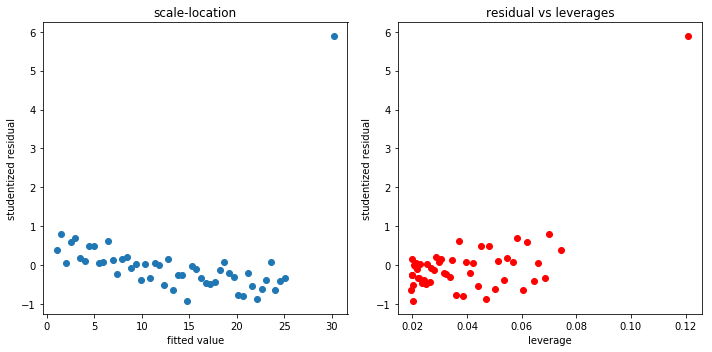

In [7]:
yh=lm.intercept+lm.slope*x0
yh
e=y0-yh
sg=sum((e)**2)/(m-2)
sgm=np.sqrt(sg)
sttdr=e/sgm
stdr=e/sgm*(np.sqrt(1-p)) ## studentized residual
cks=(stdr**2/2 )*(p/(1-p)) ## cook's distance
f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.plot(yh,stdr,'o')
plt.xlabel('fitted value')
plt.ylabel('studentized residual')
plt.title('scale-location')
f.add_subplot(1,2,2)
plt.plot(p,stdr,'ro')
plt.xlabel('leverage')
plt.ylabel('studentized residual')
plt.title('residual vs leverages')
plt.tight_layout()

### cooks distance measures the difference between the regression coefficients obtained from the full data and the regression coefficients obtained by deleting the ith observation.

The rsquared values is 0.8517601332130975


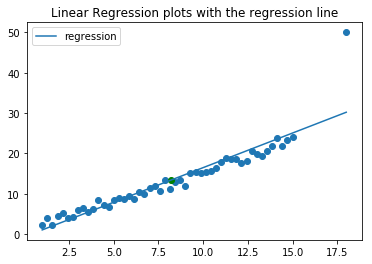

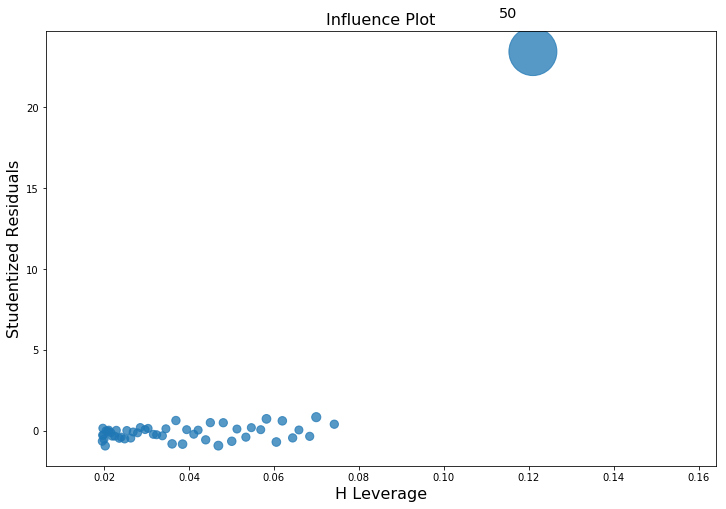

In [8]:
lm2 = sm.OLS(y0, sm.add_constant(x0)).fit() ## (sm.add_constant)let's add an intercept (beta_0) to our model
print("The rsquared values is " + str(lm2.rsquared))

plt.scatter(np.sort(x0), y0[np.argsort(x0)])
plt.scatter(np.mean(x0), np.mean(y0), color = "green")

plt.plot(np.sort(x0), lm2.predict()[np.argsort(x0)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, alpha  = 0.05, ax = ax, criterion="cooks")